# Initial claims for unemployment in the US and google search                                                  data

                

## Mehmet Fatih Yasar

## The Data Incubator_2018


#### One of the strongest leading indicators of economic activity is the number of people who file for unemployment benefits. It appears that many economists, market participants, policymakers, andfinancial markets pay particularly close attention to the report on initial unemployment insurance claims. The reason,in short, is that changes in labor market activity are thought to be useful predictors for changes in real gross domestic product (GDP), the broadest measure of economic activity. 

#### Google Trends/Search Insights data could be useful in short term predictions of economic variables. Given the importance of initial claims as a macroeconomic predictor, it would be useful to try to forecast this economic metric. 

#### The initial claims data is available from the Department of Labor, while the Google Trends data for relevant categories is available in google correlate. We applied the methodology outlined in our earlier paper, building a model to forecast initial claims using the past values of the time series, and then added the Google Trends variables to see how much they improved the forecast.

#### The objective is to predict the rate of weekly initial claims for unemployment using google search keywords.

#### DATA: The Federal Reserve Economic data set was obtained from economic research division of Federal Reserve Bank of St Louis. The data consist of the weekly initial claims for unemployment insurance in the US, as reported by the US Federal Reserve. For economic decisions based on these and similar numbers, it would help to have an early forecast of the current week's number as of the close of the week.

#### ANALYSIS: Linear Regression prediction was used for the modelling. For economic decisions based on these and similar numbers, it would help to have an early forecast of the current week's number as of the close of the week.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

pwd

In [ ]:
# Reading the .csv file

df = pd.read_csv("/Users/m.fyasar/Desktop/bsts1.csv", parse_dates=["Month"], index_col="Month" )
df.head(5)

In [8]:
print (df.shape)


(259, 7)


In [9]:
# Overview of the dataframe
df.describe()

,ICNSA,pay_chart,michigan_unemployment,military_bah,pennsylvania_unemployment,unemployment_offices,unemployment_filing
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,272704.660232,44.316602,10.984556,6.988417,3.745174,1.198842,43.185328
std,62567.588117,10.489204,4.482497,2.725821,1.464279,0.587366,11.962977
min,186451.000000,26.000000,5.000000,3.000000,1.000000,0.000000,24.000000
25%,230196.500000,36.000000,8.000000,5.000000,3.000000,1.000000,34.000000
50%,257763.000000,43.000000,10.000000,6.000000,4.000000,1.000000,41.000000
75%,302948.000000,50.000000,13.000000,8.000000,5.000000,1.000000,50.000000
max,534966.000000,100.000000,30.000000,22.000000,9.000000,4.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2013-07-27 to 2018-07-07
Data columns (total 7 columns):
ICNSA                        259 non-null int64
pay_chart                    259 non-null int64
michigan_unemployment        259 non-null int64
military_bah                 259 non-null int64
pennsylvania_unemployment    259 non-null int64
unemployment_offices         259 non-null float64
unemployment_filing          259 non-null int64
dtypes: float64(1), int64(6)
memory usage: 16.2 KB


In [11]:
#Missing values

df.isnull().sum()

ICNSA                        0
pay_chart                    0
michigan_unemployment        0
military_bah                 0
pennsylvania_unemployment    0
unemployment_offices         0
unemployment_filing          0
dtype: int64

In [12]:
np.logical_not(df.isnull()).sum() 

ICNSA                        259
pay_chart                    259
michigan_unemployment        259
military_bah                 259
pennsylvania_unemployment    259
unemployment_offices         259
unemployment_filing          259
dtype: int64

In [13]:
# Filling the null values

df.apply(lambda x: sum(x.isnull()),axis=0)

ICNSA                        0
pay_chart                    0
michigan_unemployment        0
military_bah                 0
pennsylvania_unemployment    0
unemployment_offices         0
unemployment_filing          0
dtype: int64

In [14]:
# Unique Values

df.apply(lambda x: len(x.unique()))

ICNSA                        259
pay_chart                     44
michigan_unemployment         22
military_bah                  16
pennsylvania_unemployment      9
unemployment_offices           6
unemployment_filing           51
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd65828>,
      dtype=object)

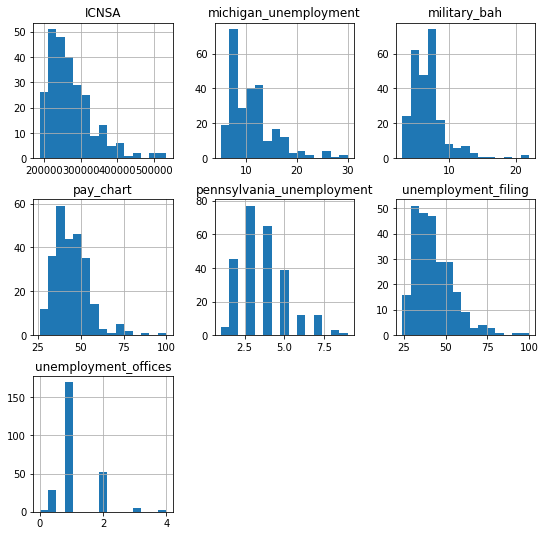

In [188]:
# Histogram all values

df.hist(bins=15, figsize=(9, 9))

In [15]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
# Redifinig the colum names

df.columns = ['icnsa', 'payc', 'micun', 'milbah', 'penun', 'unof', 'unfil']
df.head()

/Users/m.fyasar/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/Users/m.fyasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


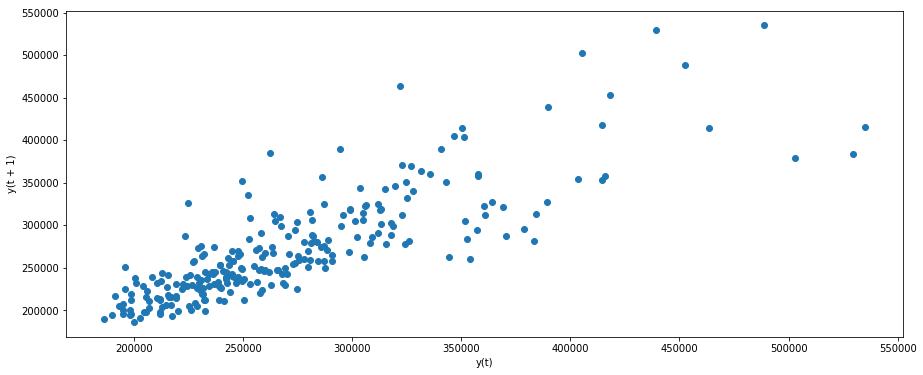

In [214]:
# Dot plots of the data

series = Series.from_csv("/Users/m.fyasar/Desktop/bsts1.csv", header=0)
lag_plot(series)
pyplot.show()

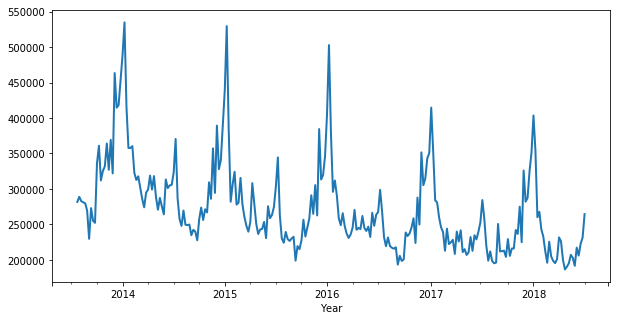

In [195]:
# Frequency of the Unemloyment Claims

df['icnsa'].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=10);

In [196]:
magn3 = df.ix[df["icnsa"] >= 3.0, "icnsa"]

/Users/m.fyasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'icnsa')

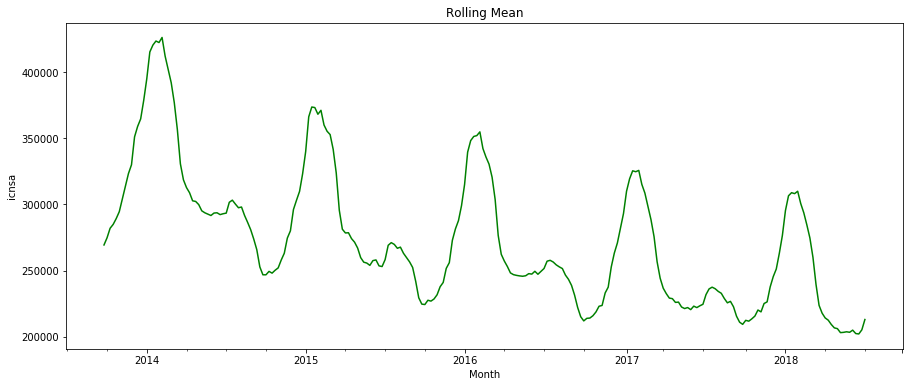

In [199]:
# Rolling mean of the Unemployment Claims

pd.Series.rolling(magn3, window=10).mean().plot(style="-g",)
plt.title( "Rolling Mean")d
plt.ylabel("icnsa")

In [140]:
icnsa = df[['icnsa']] 
payc = df[['payc']] 
micun = df[['micun']]
milbah = df[['milbah']]
penun = df[['penun']]
unof = df[['unof']]
unfil = df[['unfil']]

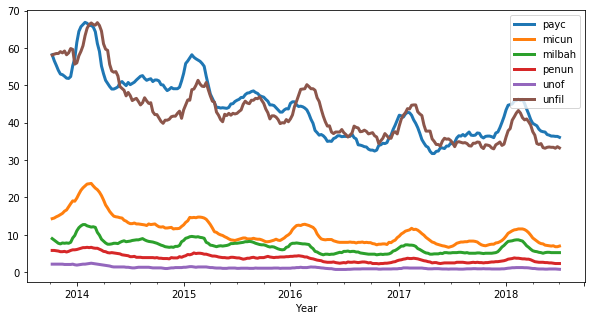

In [146]:
df_rm = pd.concat([payc.rolling(12).mean(), micun.rolling(12).mean(), milbah.rolling(12).mean(), penun.rolling(12).mean(), unof.rolling(12).mean(), unfil.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(10,5), linewidth=3, fontsize=10)
plt.xlabel('Year', fontsize=10);

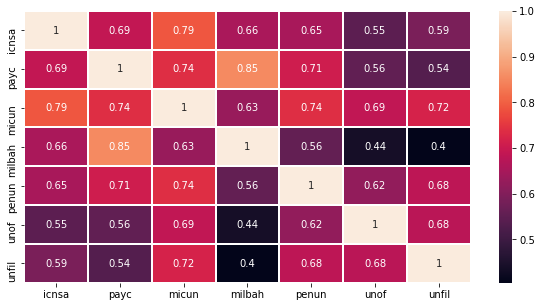

In [29]:
# Correlation Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot=True , lw=1 )

In [157]:
# Pearson Correlation

df.corr(method='pearson')

,icnsa,payc,micun,milbah,penun,unof,unfil
icnsa,1.000000,0.688562,0.789540,0.655067,0.652061,0.547282,0.588471
payc,0.688562,1.000000,0.738155,0.854988,0.708337,0.555630,0.536993
micun,0.789540,0.738155,1.000000,0.632208,0.739322,0.687192,0.720184
milbah,0.655067,0.854988,0.632208,1.000000,0.557634,0.438414,0.404792
penun,0.652061,0.708337,0.739322,0.557634,1.000000,0.622466,0.683324
unof,0.547282,0.555630,0.687192,0.438414,0.622466,1.000000,0.677077
unfil,0.588471,0.536993,0.720184,0.404792,0.683324,0.677077,1.000000


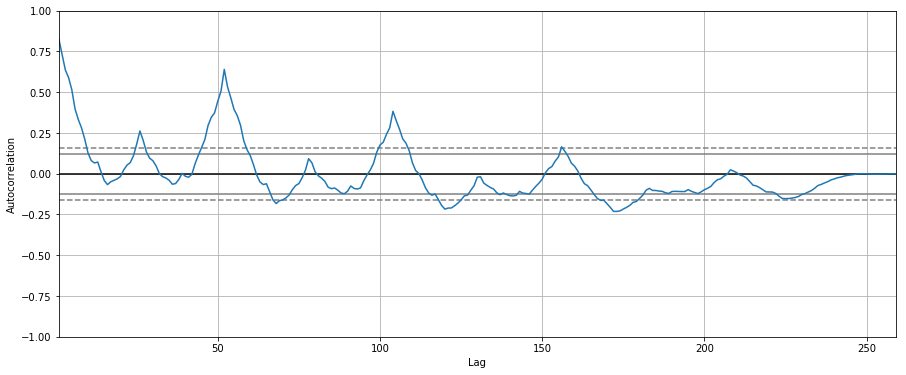

In [201]:
# Authocorrelation

pd.plotting.autocorrelation_plot(icnsa);

In [202]:
X=df[['payc', 'micun', 'milbah', 'penun', 'unof', 'unfil']]
y=df['icnsa']
# y=df['icnsa'].shift(-4)

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
# Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [205]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [127]:
# Fitting the data

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
predictions=lm.predict(X_test)

/Users/m.fyasar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/m.fyasar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


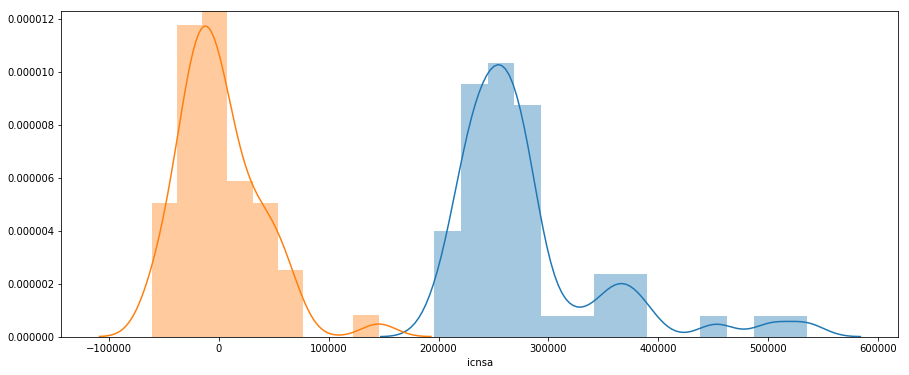

In [129]:
sns.distplot(y_test)
sns.distplot(y_test-predictions)

In [130]:
# Feature selection and coefficients

rel_imp_lst = lm.coef_
feature_lst = df.columns[:-1]
y_pos = np.arange(len(feature_lst))

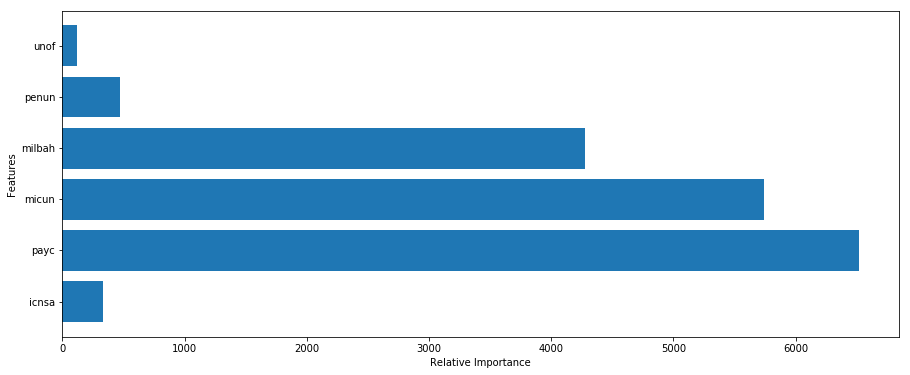

In [131]:
plt.barh(y_pos,rel_imp_lst,align='center')
plt.yticks(range(len(feature_lst)),feature_lst)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('')
plt.show()

In [200]:
# R square and correlation score

print('R square = ',lm.score(X_train,y_train))
print('Correlation = ',math.sqrt(lm.score(X_train,y_train)))

R square =  0.6480258494728734
Correlation =  0.8050005276227299


In [133]:
# Actual and predicted values

actual=pd.DataFrame(y_test.values, columns=['Actual'])
pred=pd.DataFrame(predictions, columns=['Predicted'])
disp=pd.concat([actual,pred], axis=1)
disp.head()

,Actual,Predicted
0,217011,238538.877277
1,239322,252595.732352
2,258764,283764.558294
3,248870,223087.567733
4,231539,236984.012842


In [134]:
#for the accuracy of the prediction compares, actual values and the predictions above
lm.score(X_test,y_test)

0.7139400731973686

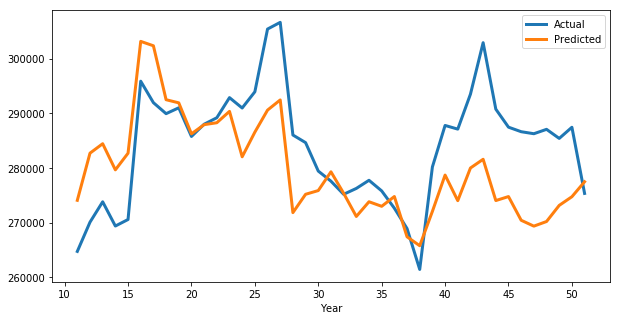

In [135]:
# Plotting Actual and Predicted Values

df_rm = pd.concat([actual.rolling(12).mean(), pred.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(10,5), linewidth=3, fontsize=10)
plt.xlabel('Year', fontsize=10);